In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Specify the data types for the columns
dtypes = {
    'INC NUMBER': 'str',
    'OCCURRED ON': 'str',
    'OCCURRED TO': 'str',
    'UCR CRIME CATEGORY': 'str',
    '100 BLOCK ADDR': 'str',
    'ZIP': 'float',
    'PREMISE TYPE': 'str',
    'GRID': 'str'
}

# Read the CSV file with specified data types
crime_data = pd.read_csv('./Resources/Crime-data.csv', dtype=dtypes)

# Drop rows with missing 'ZIP' values
crime_data = crime_data.dropna(subset=['ZIP'])

# Remove decimal points from the 'ZIP' column
crime_data['ZIP'] = crime_data['ZIP'].astype(int)

# Clean up time info
#crime_data = crime_data.dropna(subset=['OCCURRED TO'])
crime_data['OCCURRED_TO_datetime'] = pd.to_datetime(crime_data['OCCURRED TO'], errors='coerce')
crime_data['OCCURRED_TO_MMDDYY'] = crime_data['OCCURRED_TO_datetime'].dt.strftime('%m/%d/%y')
crime_data['OCCURRED_ON'] = pd.to_datetime(crime_data['OCCURRED ON'], format='%m/%d/%Y %H:%M', errors='coerce')
crime_data['OCCURRED_ON_datetime'] = crime_data['OCCURRED_ON'].dt.strftime('%m/%d/%y %H:%M')
crime_data['OCCURRED_ON_MMDDYY'] = crime_data['OCCURRED_ON'].dt.strftime('%m/%d/%y')
crime_data = crime_data.drop(columns=['OCCURRED ON', 'OCCURRED TO', 'OCCURRED_ON'])

# Display the dataframe
crime_data.head(10)

,INC NUMBER,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE,GRID,OCCURRED_TO_datetime,OCCURRED_TO_MMDDYY,OCCURRED_ON_datetime,OCCURRED_ON_MMDDYY
0,201700001603695,RAPE,38XX W CAMELBACK RD,85019,HOSPITAL,BI20,2016-03-31 00:00:00,03/31/16,11/01/15 00:00,11/01/15
1,201700001722914,LARCENY-THEFT,279XX N 23RD LN,85085,SINGLE FAMILY HOUSE,FA23,NaT,NaN,11/01/15 00:00,11/01/15
2,201500002168686,LARCENY-THEFT,14XX E HIGHLAND AVE,85014,PARKING LOT,BI30,2015-11-11 09:30:00,11/11/15,11/01/15 00:00,11/01/15
3,201600000527709,LARCENY-THEFT,33XX W CAMELBACK RD,85017,PARKING LOT,BJ21,2016-03-22 00:36:00,03/22/16,11/01/15 00:00,11/01/15
4,201600000052855,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029,SINGLE FAMILY HOUSE,DA19,2016-01-09 00:00:00,01/09/16,11/01/15 00:00,11/01/15
5,201500002103724,DRUG OFFENSE,54XX W INDIAN SCHOOL RD,85031,APARTMENT,BH16,2015-11-01 15:21:00,11/01/15,11/01/15 00:00,11/01/15
6,201500002102668,MOTOR VEHICLE THEFT,69XX W WOOD ST,85043,SINGLE FAMILY HOUSE,AF12,2015-11-01 11:50:00,11/01/15,11/01/15 00:00,11/01/15
7,201500002101405,MOTOR VEHICLE THEFT,102XX W MEDLOCK AVE,85307,SINGLE FAMILY HOUSE,BJ04,2015-11-01 05:00:00,11/01/15,11/01/15 00:00,11/01/15
8,201500002102327,LARCENY-THEFT,51XX N 15TH ST,85014,APARTMENT,BJ30,2015-11-01 09:00:00,11/01/15,11/01/15 00:00,11/01/15
9,201600000594484,RAPE,13XX E ALMERIA RD,85006,SINGLE FAMILY HOUSE,BD30,NaT,NaN,11/01/15 00:00,11/01/15


PREMISE TYPE
SINGLE FAMILY HOUSE            81608
APARTMENT                      78114
PARKING LOT                    47034
STREET / ROADWAY / SIDEWALK    36032
DEPARTMENT / DISCOUNT STORE    29177
                               ...  
REST AREA                         16
STOREROOM / SHED                  14
LAKE / WATERWAY / BEACH            9
TRIBAL LANDS                       7
MILITARY INSTALLATION              6
Name: count, Length: 98, dtype: int64


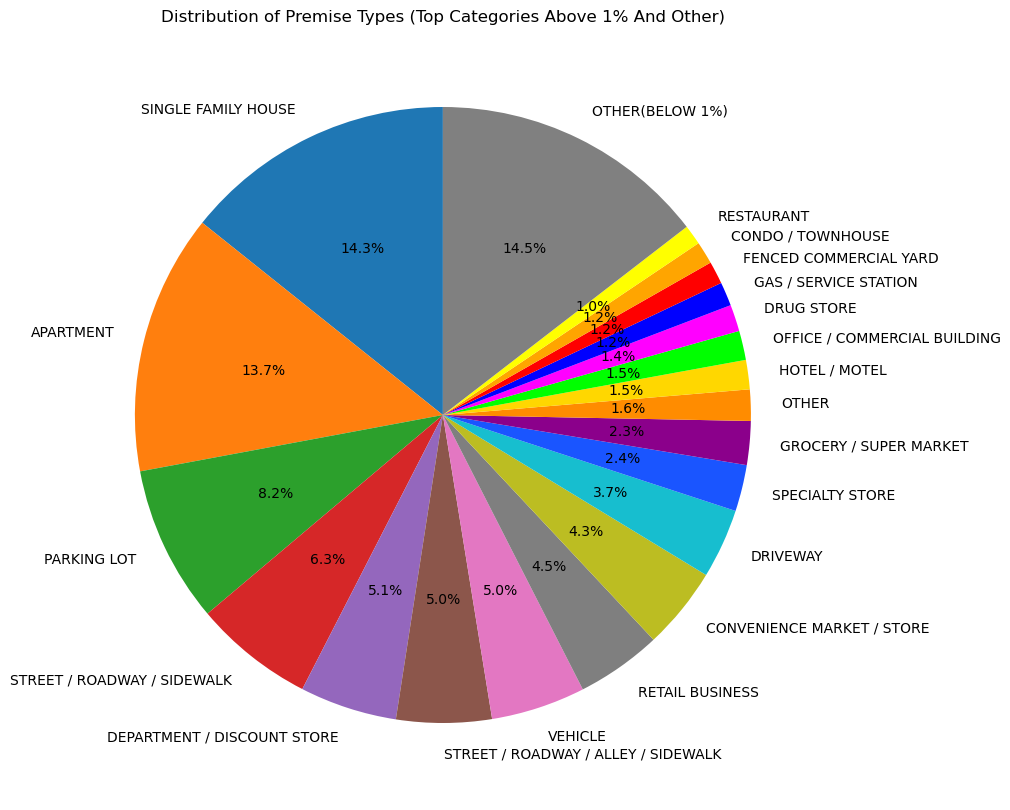

In [53]:
#check premise types and counts
premise_type_counts = crime_data['PREMISE TYPE'].value_counts()
print(premise_type_counts)

# Calculate percentages
premise_type_percentages = premise_type_counts / premise_type_counts.sum() * 100

# Identify categories below 5%
categories_below_1 = premise_type_percentages[premise_type_percentages < 1].index

#Group categories below 1% into "Other"
premise_type_counts_grouped = premise_type_counts.copy()
premise_type_counts_grouped['OTHER(BELOW 1%)'] = premise_type_counts_grouped[categories_below_1].sum()
premise_type_counts_grouped = premise_type_counts_grouped.drop(categories_below_1)
num_categories = len(premise_type_counts_grouped)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#1a55FF', '#8B008B', '#FF8C00', '#FFD700', '#00FF00', '#FF00FF', '#0000FF', '#FF0000', '#FFA500', '#FFFF00', 'grey']
if num_categories > len(colors):
    colors.extend(['grey'] * (num_categories - len(colors)))


# Create the pie chart using only the top categories and 'Other'
plt.figure(figsize=(10, 10))
plt.pie(premise_type_counts_grouped.values, labels=premise_type_counts_grouped.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Premise Types (Top Categories Above 1% And Other)')
plt.show()



In [54]:
# Correlation analysis between premise type vs. crimes
# Possible occurrence of crime vs. premise type
premise_crime_summary = crime_data.groupby('PREMISE TYPE')['UCR CRIME CATEGORY'].value_counts().unstack(fill_value=0)
premise_crime_summary


UCR CRIME CATEGORY,AGGRAVATED ASSAULT,ARSON,BURGLARY,DRUG OFFENSE,LARCENY-THEFT,MOTOR VEHICLE THEFT,MURDER AND NON-NEGLIGENT MANSLAUGHTER,RAPE,ROBBERY
PREMISE TYPE,,,,,,,,,
ABANDONED/CONDEMNED STRUCTURE,24,13,64,84,22,4,1,20,3
ADULT ONLY STORE / MOVIE,20,1,25,9,114,16,0,5,27
AIRPORT,50,1,82,358,2116,157,0,4,6
ALLEY,358,77,2,1040,237,95,28,107,180
AMUSEMENT PARK,14,0,16,1,99,15,0,2,3
...,...,...,...,...,...,...,...,...,...
TRAIN STATION,5,1,4,13,32,0,0,1,4
TRIBAL LANDS,1,0,0,0,4,1,0,1,0
UNKNOWN,316,2,16,65,2093,313,20,528,23


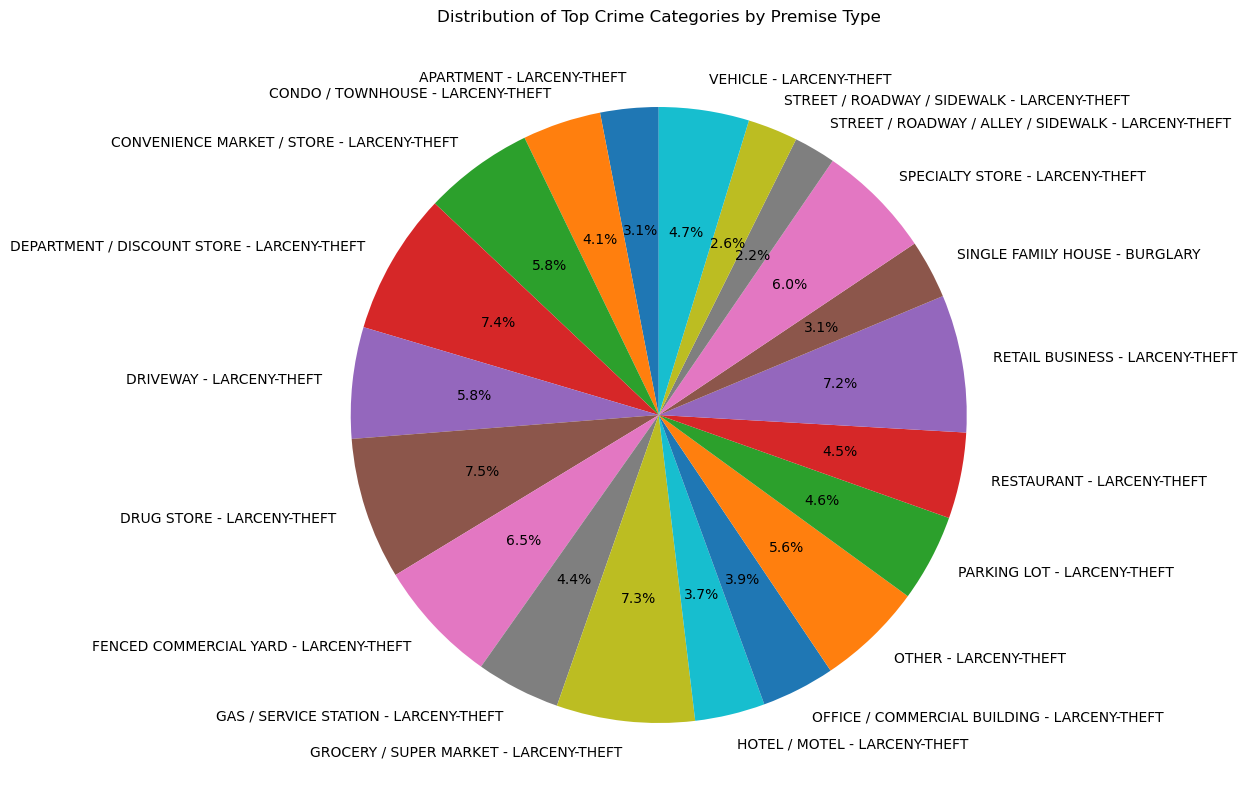

                           Premise Type Top Crime Category  Percentage  \
0                             APARTMENT      LARCENY-THEFT   36.119006   
1                     CONDO / TOWNHOUSE      LARCENY-THEFT   48.747963   
2            CONVENIENCE MARKET / STORE      LARCENY-THEFT   68.265847   
3           DEPARTMENT / DISCOUNT STORE      LARCENY-THEFT   88.072797   
4                              DRIVEWAY      LARCENY-THEFT   69.081941   
5                            DRUG STORE      LARCENY-THEFT   88.161178   
6                FENCED COMMERCIAL YARD      LARCENY-THEFT   77.084256   
7                 GAS / SERVICE STATION      LARCENY-THEFT   52.338936   
8                GROCERY / SUPER MARKET      LARCENY-THEFT   85.738242   
9                         HOTEL / MOTEL      LARCENY-THEFT   43.491124   
10         OFFICE / COMMERCIAL BUILDING      LARCENY-THEFT   45.587063   
11                                OTHER      LARCENY-THEFT   65.848976   
12                          PARKING LO

In [95]:
# Get the top crime category for each premise type
top_crime_category = premise_crime_summary.idxmax(axis=1)

# Calculate the percentage of the top crime category for each premise type
top_crime_percentage = premise_crime_summary.max(axis=1) / premise_crime_summary.sum(axis=1) * 100

# Create a DataFrame to store the results
top_crime_df = pd.DataFrame({
    'Premise Type': top_crime_category.index,
    'Top Crime Category': top_crime_category.values,
    'Percentage': top_crime_percentage.values
})
top_crime_df['Combined Label'] = top_crime_df['Premise Type'] + ' - ' + top_crime_df['Top Crime Category']
plt.figure(figsize=(10, 10))
plt.pie(top_crime_percentage.values, labels=top_crime_df['Combined Label'].values, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Top Crime Categories by Premise Type')
plt.show()
print(top_crime_df)


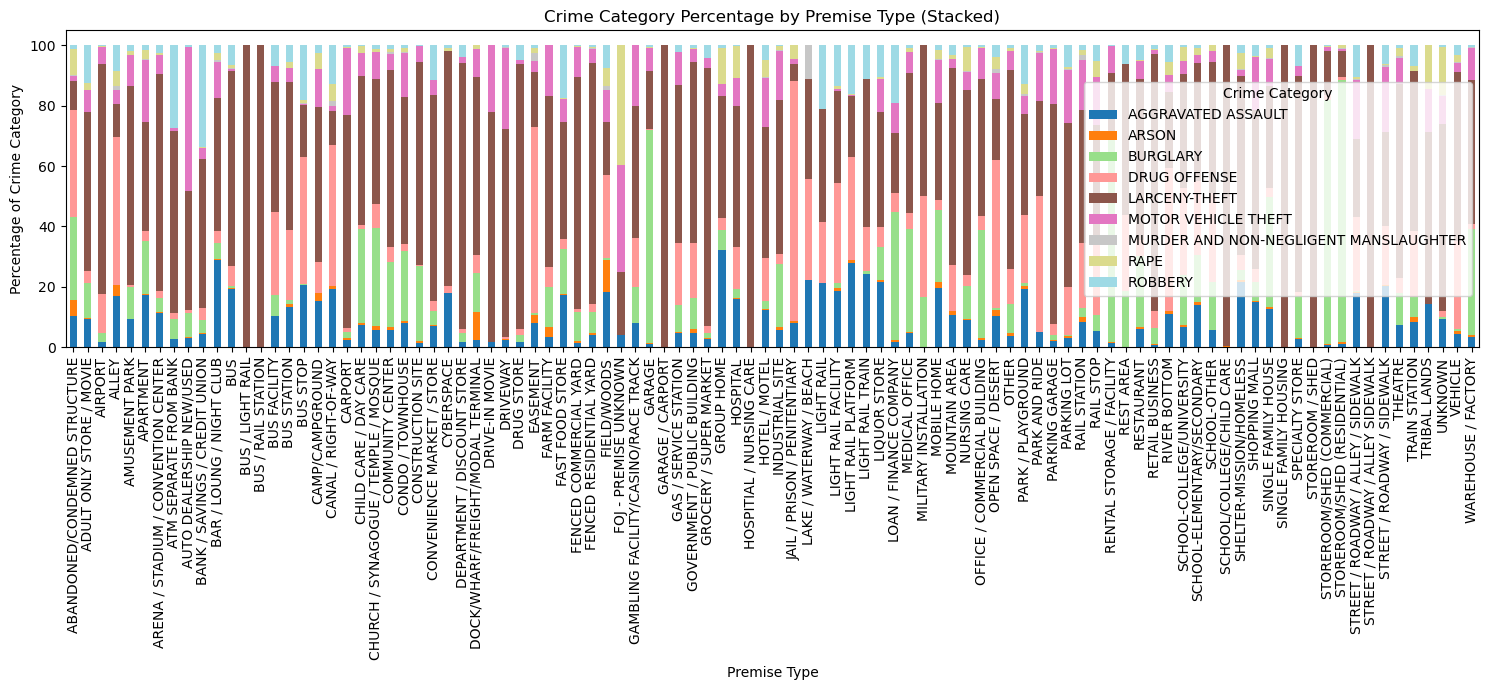

In [71]:
#Plot bar chart to analyze crime percentage pareto under each premise type
# Calculate total crime counts for each premise type
total_crime_per_premise = premise_crime_summary.sum(axis=1)

# Calculate percentages for each crime category
for col in premise_crime_summary.columns:
    premise_crime_summary[col] = (premise_crime_summary[col] / total_crime_per_premise) * 100

# Plot the stacked bar chart
premise_crime_summary.plot(kind='bar', stacked=True, figsize=(15, 7), colormap='tab20')
plt.xlabel('Premise Type')
plt.ylabel('Percentage of Crime Category')
plt.title('Crime Category Percentage by Premise Type (Stacked)')
plt.xticks(rotation=90)
plt.legend(title='Crime Category')
plt.tight_layout()
plt.show()

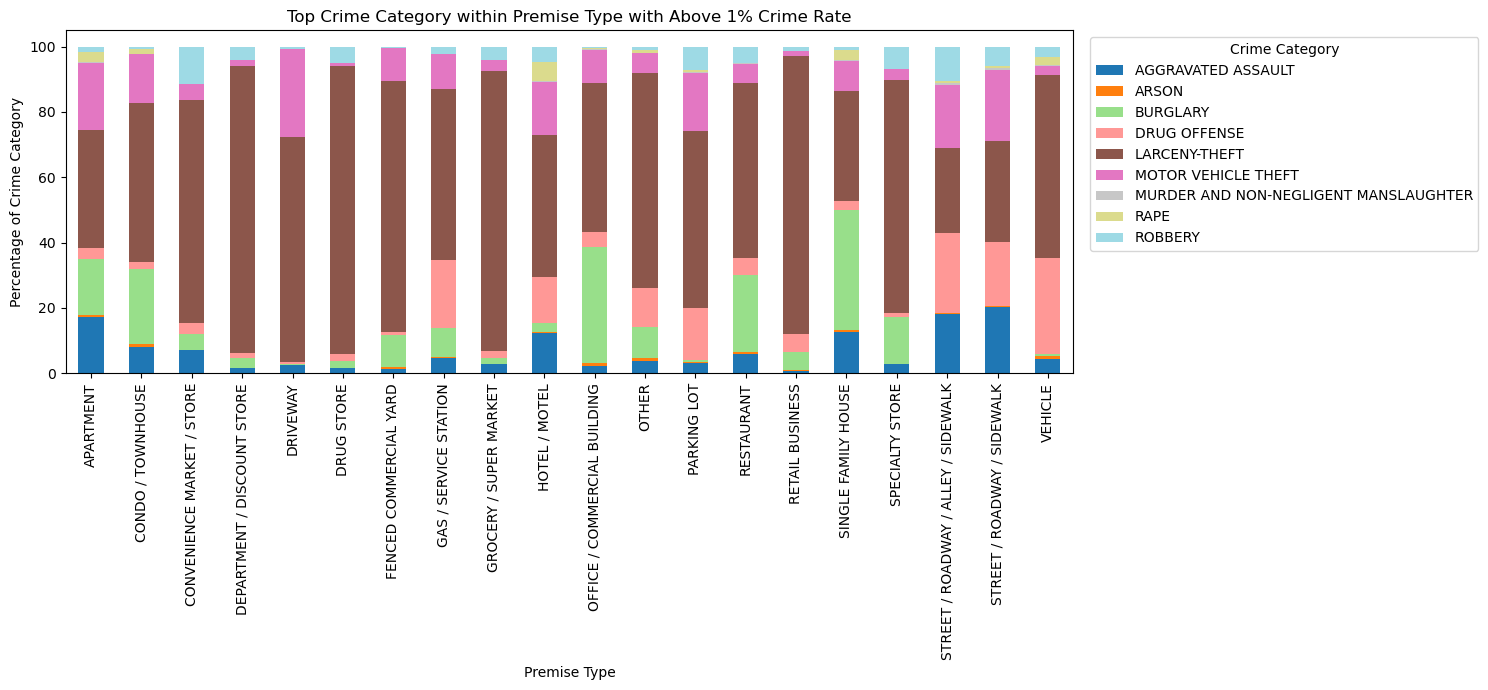

In [87]:
# Filter the data with premise types only over 1% crime cases
total_crime_percentage = (total_crime_per_premise / total_crime_per_premise.sum()) * 100

#Filter premise types with above 1% crime
filtered_premise_types = premise_type_percentages[premise_type_percentages > 1].index
filtered_crime_data = crime_data[crime_data['PREMISE TYPE'].isin(filtered_premise_types)]

# Calculate total crime counts for each premise type
total_crime_per_premise = premise_crime_summary.sum(axis=1)

# Calculate percentages for each crime category
for col in premise_crime_summary.columns:
    premise_crime_summary[col] = (premise_crime_summary[col] / total_crime_per_premise) * 100

# Plot the stacked bar chart using the filtered data
premise_crime_summary.plot(kind='bar', stacked=True, figsize=(15, 7), colormap='tab20')
plt.xlabel('Premise Type')
plt.ylabel('Percentage of Crime Category')
plt.title('Top Crime Category within Premise Type with Above 1% Crime Rate')
plt.xticks(rotation=90)
plt.legend(title='Crime Category', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [88]:
# Plot filtered data against total percentage

